# Teclov: Loan Analysis

# Business Objective

1) A Consumer Finance Company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

2) The company can utilise this knowledge for its portfolio and risk assessment.

3) Two types of risks are associated with the bank’s decision:

1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

# Problem Solving Methodology

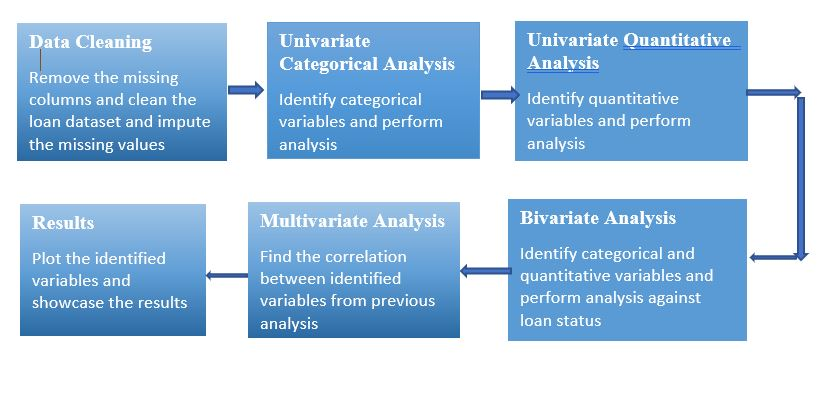

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [2]:
#Loading dataset
loan = pd.read_csv('F:/teclov/Assignment-5/loan.csv')

# Getting insight of data

print(loan.shape)

(39717, 111)


D:\ananconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Get the row count of each column in the Data frame
print(loan.count())

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26777
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


# Data Cleaning

In [5]:
#Remove columns which contains no data
loan = loan[[ cols for cols in loan if loan[cols].count() > 0 ]]

#Getting number of columns
print(len(loan.columns))

57


In [6]:
#Get the percentage of missing data for each column
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [7]:
#Dropping the columns which contains more percentage of missing data
loan = loan.drop(['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pub_rec_bankruptcies',], axis=1)

#Get the percentage of missing data for each column after dropping
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util          

# Impute the missing values
Prepare the annual_inc column by segmenting the values to fill the missing data of emp_length column

In [8]:
#Get the statistics of annual_inc 
print(loan['annual_inc'].describe())

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [9]:
#Segment the values of annual income into different categories
bins = [0,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 6000000]
labels = [ '<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','>90000']
loan['annual_inc_category'] = pd.cut(loan['annual_inc'], bins=bins, labels=labels)

#Converting  column type to Object type
loan['annual_inc_category'] = loan['annual_inc_category'].astype('object')

In [10]:
#Get the value counts of each category in emp_length
print(loan.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


Definition of Mode:
Mode is a statistical term that refers to the most frequently occurring number found in a set of numbers. The mode is found by collecting and organizing data in order to count the frequency of each result. The result with the highest count of occurrences is the mode of the set, also referred to as the modal value.

Impute the missing values of emp_length with the mode value of each group of target(loan_status) column and the closely related(annual_inc) column.

In [11]:
#Function to Identify the Mode for a group of data
def mode_in_group(grp):
    try:
        mode_val = grp.value_counts().index[0]
        return(mode_val)
    except IndexError:
        return('value_missing')

#Impute the missing(na) values with the mode value for each group of data on loan_status and annual_inc     
loan['emp_length'] = loan.groupby(['loan_status','annual_inc_category'])['emp_length'].apply(lambda x: x.fillna(mode_in_group(x)))

#Remove the records with missing value
loan = loan[loan['emp_length'] != 'value_missing']

In [12]:
#Get the percentage of missing data for each column after imputing the missing values
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util          

Removing the missing rows for the columns "last_credit_pull_d", "revol_util" as the missing data percentage is very less.

In [13]:
#Remove the missing rows by selecting not null records
loan = loan[loan['last_credit_pull_d'].notnull()]
loan = loan[loan['revol_util'].notnull()]

In [14]:
#drop the irrelevant columns which does not have  impact on loan default 
loan = loan.drop(['last_pymnt_d','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths'], axis=1)

In [15]:
#Get the percentage of missing data for each column after cleaning the columns and data 
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prnc

In [16]:
#Verifing data insight
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
count,3.966400e+04,3.966400e+04,39664.000000,39664.000000,39664.000000,39664.000000,3.966400e+04,39664.000000,39664.000000,39664.000000,...,39664.000000,39664.000000,39664.000000,39664.000000,39664.000000,39664.000000,39664.000000,39664.0,39664.0,39664.0
mean,6.833403e+05,8.507436e+05,11228.283204,10956.189492,10406.445427,324.788282,6.899905e+04,13.319266,0.146506,0.869176,...,11577.711693,9801.972918,2265.479627,1.361813,95.195029,12.387697,2681.806317,1.0,0.0,0.0
std,2.106493e+05,2.655808e+05,7456.539304,7187.063350,7128.301868,208.880532,6.379053e+04,6.676762,0.491607,1.070400,...,8943.139301,7065.400620,2609.193500,7.291360,689.095498,148.716815,4449.285858,0.0,0.0,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
25%,5.163262e+05,6.669995e+05,5500.000000,5400.000000,5000.000000,167.080000,4.051716e+04,8.180000,0.000000,0.000000,...,5125.537500,4600.000000,662.845000,0.000000,0.000000,0.000000,219.040000,1.0,0.0,0.0
50%,6.660180e+05,8.512290e+05,10000.000000,9637.500000,8975.000000,280.615000,5.900000e+04,13.410000,0.000000,1.000000,...,9295.320000,8000.000000,1350.870000,0.000000,0.000000,0.000000,547.125000,1.0,0.0,0.0
75%,8.378690e+05,1.047523e+06,15000.000000,15000.000000,14400.000000,430.805000,8.240000e+04,18.600000,0.000000,1.000000,...,15811.120000,13700.000000,2836.285000,0.000000,0.000000,0.000000,3300.375000,1.0,0.0,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0


checking outliers if present and dropping  the columns with 0 values

In [17]:
#drop columns with 0 values
loan = loan.drop(['policy_code','acc_now_delinq','delinq_amnt'], axis=1)

In [18]:
#Analyse the outliers for annual_inc 
print(loan['annual_inc'].quantile([0.95,0.99,1.0]))

0.95     142000.00
0.99     234997.48
1.00    6000000.00
Name: annual_inc, dtype: float64


In [19]:
#clearing the outliers in annual_income as there is lot of difference between 6000000 and 234997.48 
loan = loan[loan['annual_inc']<=234997.48]
print(len(loan))

39267


In [20]:
#Verify the data in all the columns after removing outliers
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,3.926700e+04,3.926700e+04,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,...,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000
mean,6.833699e+05,8.507867e+05,11142.708254,10874.195253,10329.084655,322.236964,65559.628725,13.380547,0.145491,0.866733,...,50.780778,50.542738,12061.295908,11480.422281,9722.457178,2242.704932,1.360310,94.773566,12.199085,2655.489320
std,2.106470e+05,2.656009e+05,7375.980522,7108.527618,7049.623495,206.211981,35209.831672,6.661474,0.490053,1.068022,...,371.803376,370.456786,8929.639157,8830.426539,6982.381778,2573.163892,7.285505,686.438089,146.646865,4404.831198
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.165105e+05,6.671680e+05,5500.000000,5375.000000,5000.000000,166.500000,40000.000000,8.275000,0.000000,0.000000,...,0.000000,0.000000,5567.352248,5098.605000,4550.000000,659.885000,0.000000,0.000000,0.000000,217.985000
50%,6.660240e+05,8.512350e+05,10000.000000,9600.000000,8925.000000,279.100000,58000.080000,13.480000,0.000000,1.000000,...,0.000000,0.000000,9841.692863,9251.440000,8000.000000,1340.720000,0.000000,0.000000,0.000000,542.210000
75%,8.377970e+05,1.047364e+06,15000.000000,15000.000000,14284.385310,426.240000,81000.000000,18.640000,0.000000,1.000000,...,0.000000,0.000000,16435.163950,15686.140000,13475.000000,2808.910000,0.000000,0.000000,0.000000,3267.250000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,234996.000000,29.990000,11.000000,8.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


Clean the values and converting the types of column

In [21]:
#Remove the blank space in the values for term column
loan['term'] = loan['term'].str.strip()

#Remove % sign in the values and convert to float for int_rate column
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate'] = loan['int_rate'].astype('float')
loan['int_rate'] = round(loan['int_rate'])

#Remove % sign in the values and convert to float for revol_util column
loan['revol_util'] = loan['revol_util'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].astype('float')
loan['revol_util'] = round(loan['revol_util'])

# Get the Data Frame based on Target Variable(Class Label)

In [22]:
#Take copy of loan Dataframe to master Dataframe
master_loan = loan.copy()

In [23]:
#Identify Unique values in Target Variable
print(master_loan['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


# Classify data into Categorical and Quantitative Variables

In [30]:
#Get all categorical columns of type Object
master_loan_category = master_loan.select_dtypes(include = ['O'])
print(master_loan_category.columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d', 'application_type',
       'annual_inc_category'],
      dtype='object')


In [31]:
#Dropping unwanted columns in Categorical columns
master_loan_category.drop(['pymnt_plan','url','zip_code','initial_list_status','application_type'],axis=1,inplace=True)
print(master_loan_category.columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line', 'last_credit_pull_d',
       'annual_inc_category'],
      dtype='object')


D:\ananconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
#Get all Quantitative columns of type float and int
master_loan_num = master_loan.select_dtypes(include = ['float64', 'int64'])

#include the loan_status column for analysis
master_loan_num['loan_status'] = master_loan_category['loan_status']
print(master_loan_num.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'loan_status'],
      dtype='object')


D:\ananconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [33]:
#Dropping unwanted columns in quantitative columns
master_loan_num.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],axis=1,inplace=True)
print(master_loan_num.columns)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'loan_status'],
      dtype='object')


D:\ananconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Univariate - Categorical Variables Analysis

In [34]:
#Get the Target variable Dataframe with only Charged Off
master_category = master_loan_category[master_loan_category['loan_status'] == 'Charged Off']
master_num = master_loan_num[master_loan_num['loan_status'] == 'Charged Off']

In [35]:
master_category

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,last_credit_pull_d,annual_inc_category
1,60 months,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,Apr-99,Sep-13,20000-30000
8,60 months,F,F2,4 years,OWN,Source Verified,Dec-11,Charged Off,small_business,CA,Apr-04,Aug-12,30000-40000
9,60 months,B,B5,< 1 year,RENT,Verified,Dec-11,Charged Off,other,TX,Sep-04,Mar-13,10000-20000
12,36 months,C,C1,< 1 year,RENT,Source Verified,Dec-11,Charged Off,debt_consolidation,VA,Apr-04,Nov-12,20000-30000
14,36 months,B,B2,3 years,RENT,Source Verified,Dec-11,Charged Off,other,CA,May-91,Mar-14,>90000
21,36 months,B,B4,10+ years,RENT,Verified,Dec-11,Charged Off,debt_consolidation,FL,Feb-83,May-16,>90000
24,36 months,B,B3,1 year,RENT,Not Verified,Dec-11,Charged Off,major_purchase,CA,Jun-01,Mar-13,70000-80000
26,36 months,C,C2,9 years,RENT,Not Verified,Dec-11,Charged Off,debt_consolidation,NY,Oct-03,May-16,50000-60000
27,60 months,D,D2,2 years,RENT,Not Verified,Dec-11,Charged Off,other,PA,Oct-03,May-13,50000-60000
46,36 months,A,A5,10+ years,MORTGAGE,Source Verified,Dec-11,Charged Off,debt_consolidation,OH,Jun-95,Dec-14,>90000


Text(0.5,1,'Total Terms')

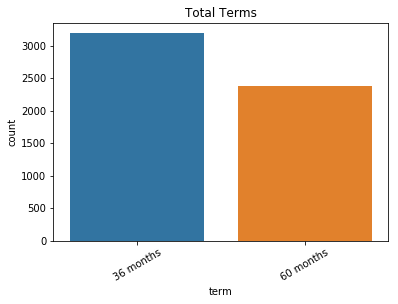

In [39]:
#plotting bar chart of term vs no of counts
df1 = master_category.groupby('term')['term'].count().reset_index(name='count').sort_values('count',ascending=False)
q = sns.barplot(x="term", y="count", data=df1)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Terms')

Observation:
  By seeing the plot we can notice that count of 36 month tenure is more than that of 60 months term when loan status is charged off.  

Text(0.5,1,'Total Grade')

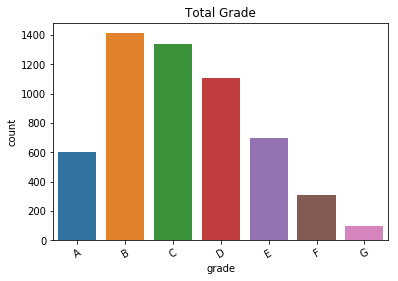

In [40]:
#Plotting bar chart  grade variable vs count
df = master_category.groupby('grade')['grade'].count().reset_index(name='count').sort_values('grade',ascending=True)
q = sns.barplot(x="grade", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Grade')

Observation:
    By seeing the plot we can notice that count of grade B is highest when loan status is charged off.

Text(0.5,1,'Total sub_grade')

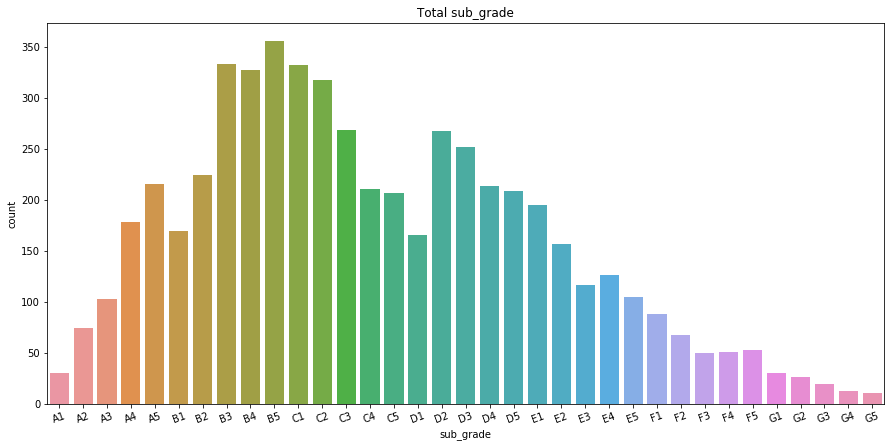

In [46]:
#Same analysis with sub_grade variable
df = master_category.groupby('sub_grade')['sub_grade'].count().reset_index(name='count').sort_values('sub_grade',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(15,7)
q = sns.barplot(x="sub_grade", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=20)
plt.title('Total sub_grade')

Observation :
    There are more of counts from grade A to B when loan status is charged off

Text(0.5,1,'Total Employee Length')

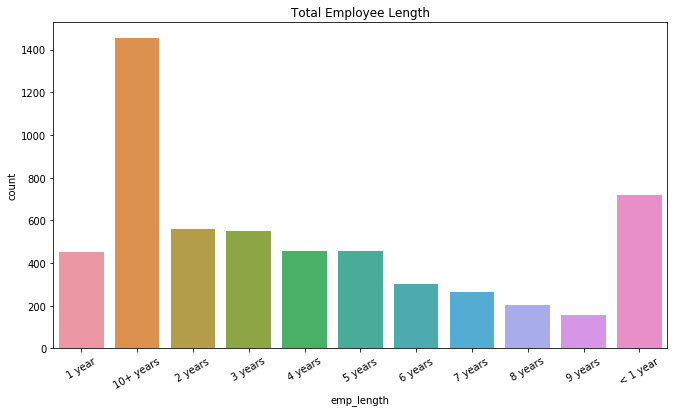

In [50]:
#Doing same analysis with emp_length variable
df = master_category.groupby('emp_length')['emp_length'].count().reset_index(name='count').sort_values('emp_length',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,6)
q = sns.barplot(x="emp_length", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Employee Length')

Observation:
    Employee length greater than 10 years has more number of loan defaulters

Text(0.5,1,'Home ownership')

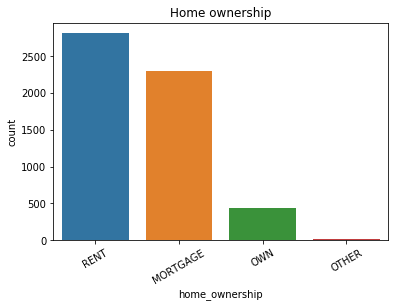

In [56]:
#Doing same analysis with home_ownership variable
df = master_category.groupby('home_ownership')['home_ownership'].count().reset_index(name='count').sort_values('count',ascending=False)
q = sns.barplot(x="home_ownership", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Home ownership')

Observation:
    Rent type of home ownership have more number of defaulters than rest

Text(0.5,1,'Verification status')

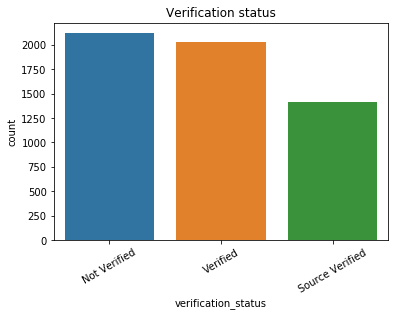

In [57]:
#Doing same with verification_status variable
df = master_category.groupby('verification_status')['verification_status'].count().reset_index(name='count').sort_values('count',ascending=False)
q = sns.barplot(x="verification_status", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Verification status')

Text(0.5,1,'Purpose of taking Loan')

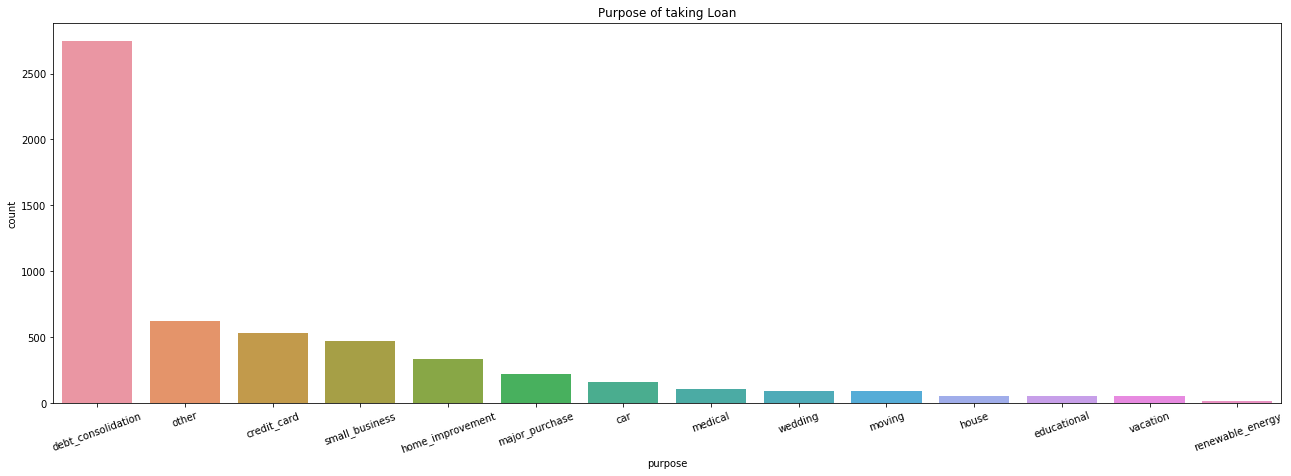

In [55]:
#Plotting bar plot with purpose variable
df = master_category.groupby('purpose')['purpose'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(22,7)
q = sns.barplot(x="purpose", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=20)
plt.title('Purpose of taking Loan')

Text(0.5,1,'Address State')

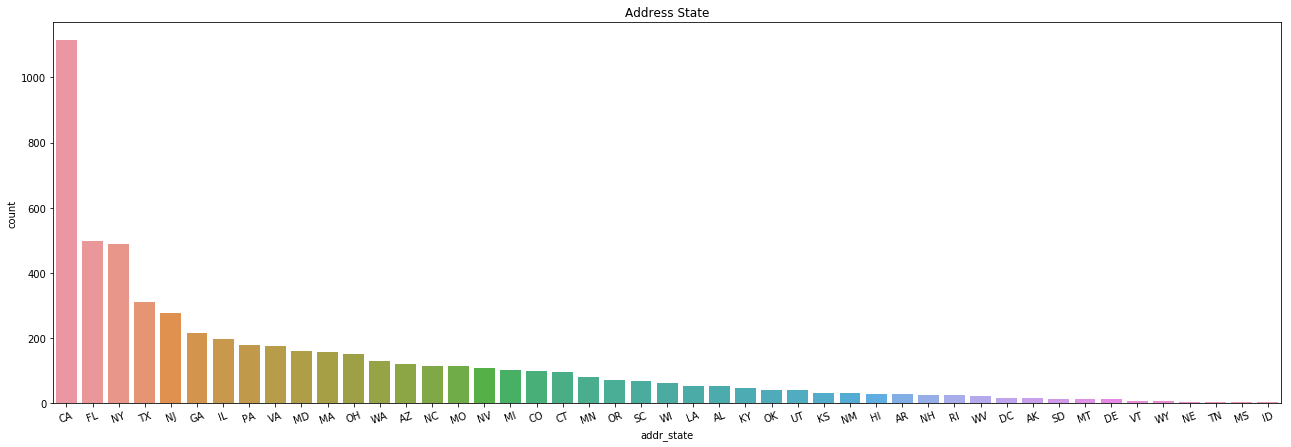

In [59]:
#Plotting addr_state variable
df = master_category.groupby('addr_state')['addr_state'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(22,7)
q = sns.barplot(x="addr_state", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=20)
plt.title('Address State')

# Analysis of Derived Metric

D:\ananconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ananconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\ananconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

Text(0.5,1,'Issue Year')

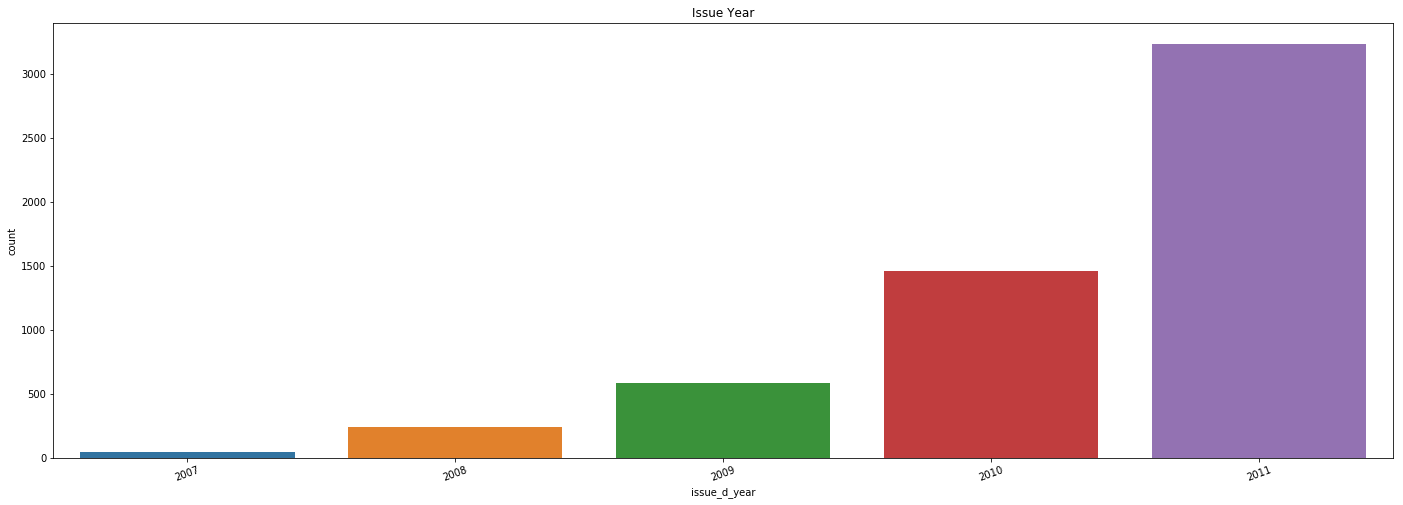

In [60]:
#Analysis with issue_d variable
#Convert the issue date to datetime type
master_category['issue_d'] = pd.to_datetime(master_category['issue_d'],format='%b-%y')
#extract month
master_category['issue_d_mon'] = master_category['issue_d'].map(lambda x : x.month)
#extract year
master_category['issue_d_year'] = master_category['issue_d'].map(lambda x : x.year)

df = master_category.groupby('issue_d_year')['issue_d_year'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
q = sns.barplot(x="issue_d_year", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=20)
plt.title('Issue Year')

D:\ananconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ananconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,'Earliest Credit Line Year')

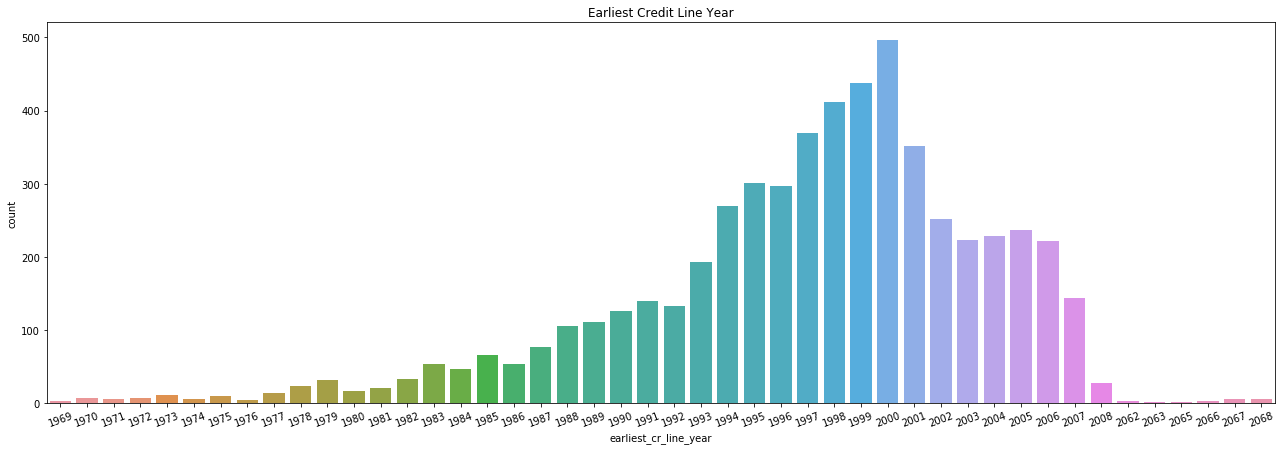

In [61]:
#Analysis of earliest_cr_line variable The month the borrower's earliest reported credit line was opened
#Get the count of Grouped by loan_status and plot
master_category['earliest_cr_line'] = pd.to_datetime(master_category['earliest_cr_line'], format='%b-%y')
#extract year
master_category['earliest_cr_line_year'] = master_category['earliest_cr_line'].map(lambda x : x.year)

df = master_category.groupby('earliest_cr_line_year')['earliest_cr_line_year'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(22,7)
q = sns.barplot(x="earliest_cr_line_year", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=20)
plt.title('Earliest Credit Line Year')

D:\ananconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ananconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Last Credit Pull Year')

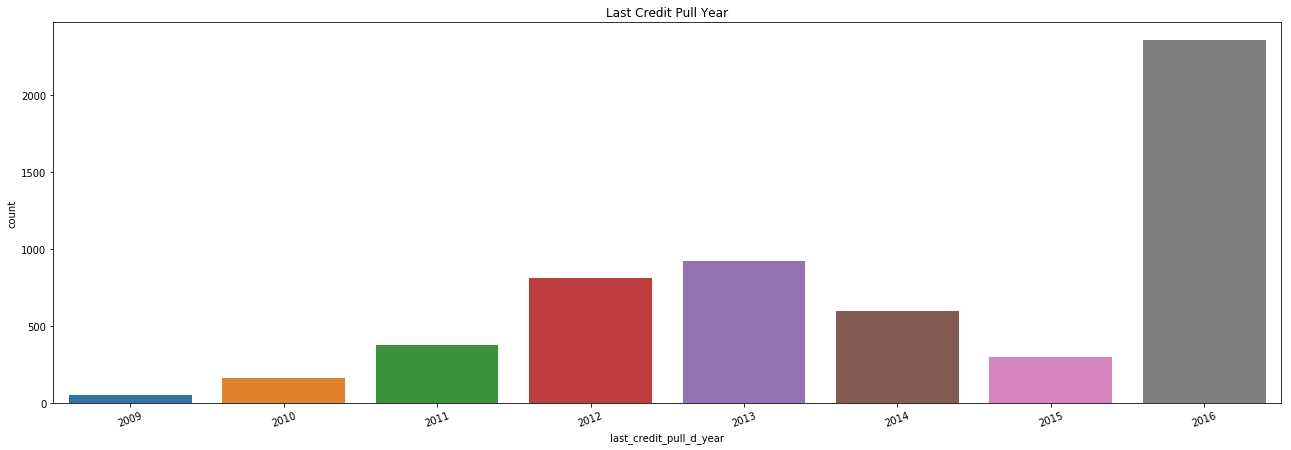

In [62]:
#Analysis for the most recent month LC pulled credit for the loan 

master_category['last_credit_pull_d'] = pd.to_datetime(master_category['last_credit_pull_d'], format='%b-%y')

#extract year
master_category['last_credit_pull_d_year'] = master_category['last_credit_pull_d'].map(lambda x : x.year)

df = master_category.groupby('last_credit_pull_d_year')['last_credit_pull_d_year'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(22,7)
q = sns.barplot(x="last_credit_pull_d_year", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=20)
plt.title('Last Credit Pull Year')

# Observation for Univariate- Categorical Variables Analysis

By plotting all bar charts now we can make some observations regarding categorical variables when loan status is charged off. 

       Variable Name                Attribute Type                    Observation
       
        term                         Loan                             Term with 36 months has more number of defaulters.
        grade                        Consumer                         Grade B and A have more number of Loan defaulters
        sub_grade                    consumer                         From grade B to A more number of default level
        emp_length                   Consumer                         Employee length greater than 10 years have some default
        home_ownership               Consumer                         Rent type home ownership have more defaulters.
        verfication_status           Loan                             Not verfied loan status have more default rate.
        issue_d                      Loan                             2011 have more defaulters
        purpose                      Consumer                         Debt_consolidation have more default rate
        addr_state                   Consumer                         CA and FL have more default rate
        earlist_cr_line              Consumer                         year 2000 have more default rate
        last_credit_pull_d           Loan                             year 2016 have more number of defaulters
        

# Univariate - Quantitative Variables Analysis

D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Loan Amount Distribution')

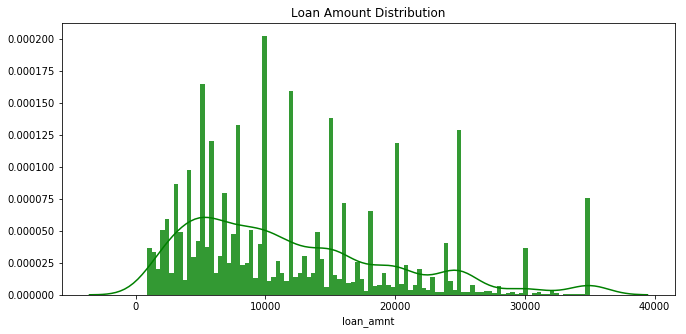

In [72]:
#To do analysis of Loan amount distribution we will plot seaborn.distplot
plt.figure(figsize=(11, 5))
sns.distplot(master_num['loan_amnt'], color='g', bins=100, hist_kws={'alpha': 0.8});
plt.title('Loan Amount Distribution')


D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Interest Rate Distribution')

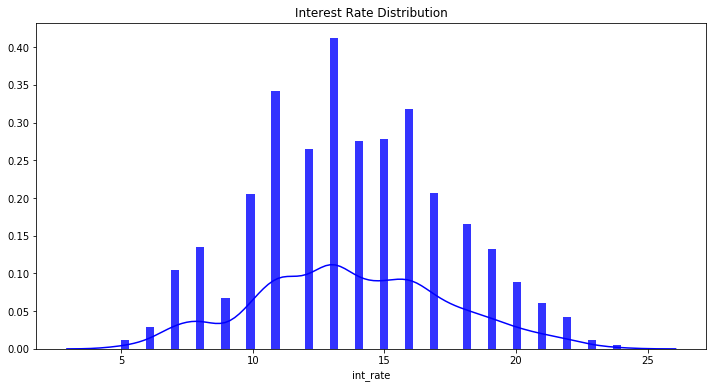

In [75]:
#interest rate distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['int_rate'], color='b', bins=60, hist_kws={'alpha': 0.8});
plt.title('Interest Rate Distribution')


D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Installment Distribution')

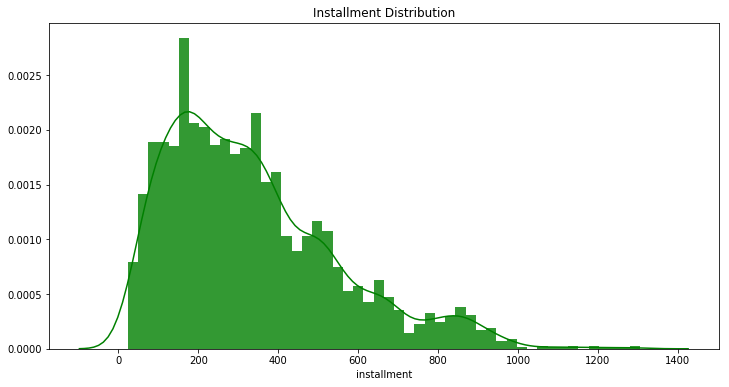

In [80]:
#installment distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['installment'], color='g', bins=50, hist_kws={'alpha': 0.8});
plt.title('Installment Distribution')

D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Annual income Distribution')

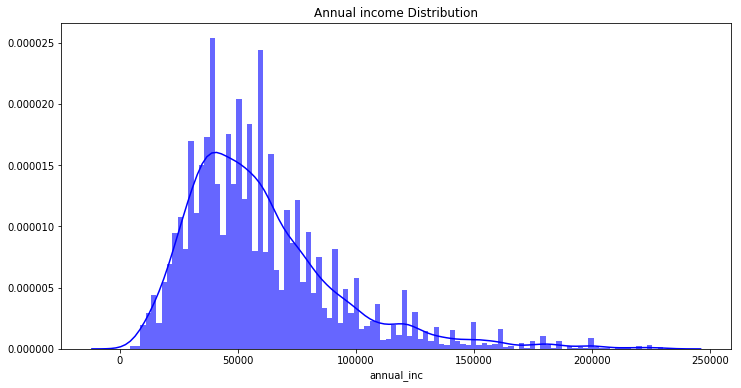

In [89]:
#annual income distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['annual_inc'], color='b', bins=100, hist_kws={'alpha': 0.6});
plt.title('Annual income Distribution')

D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Debt to income Distribution')

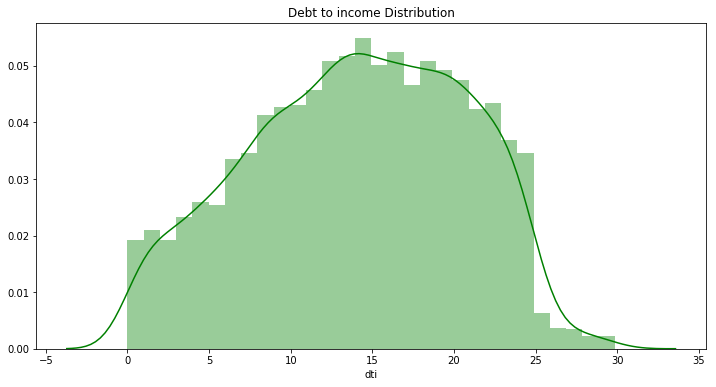

In [88]:
#Debt to income distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['dti'], color='g', bins=30, hist_kws={'alpha': 0.4});
plt.title('Debt to income Distribution')

D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Delinquency Distribution')

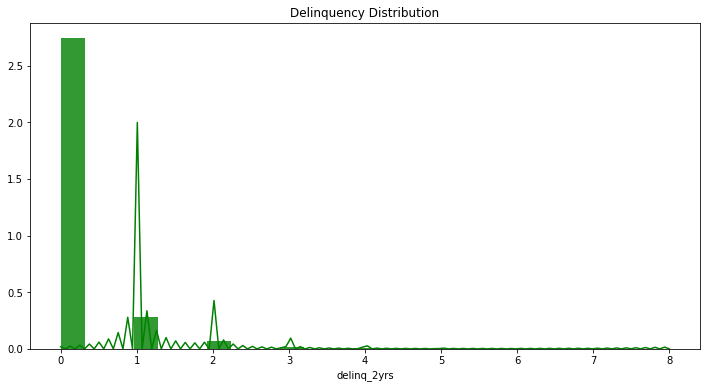

In [91]:
#delinquency distribution
#The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

plt.figure(figsize=(12, 6))
sns.distplot(master_num['delinq_2yrs'], color='g', bins=25, hist_kws={'alpha': 0.8});
plt.title('Delinquency Distribution')

D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Inquiry in last 6 months Distribution')

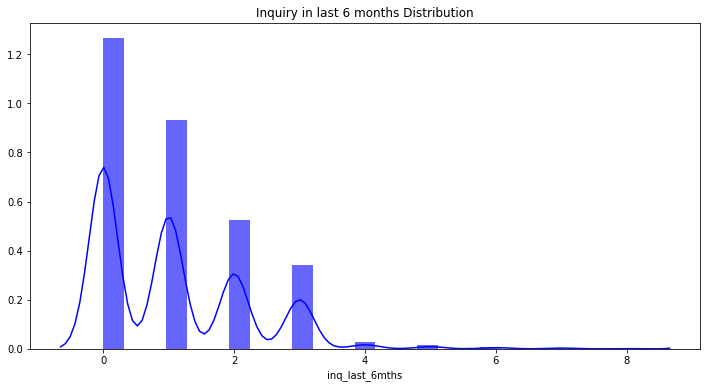

In [92]:
#The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
plt.figure(figsize=(12, 6))
sns.distplot(master_num['inq_last_6mths'], color='b', bins=25, hist_kws={'alpha': 0.6});
plt.title('Inquiry in last 6 months Distribution')


D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Open Account Distribution')

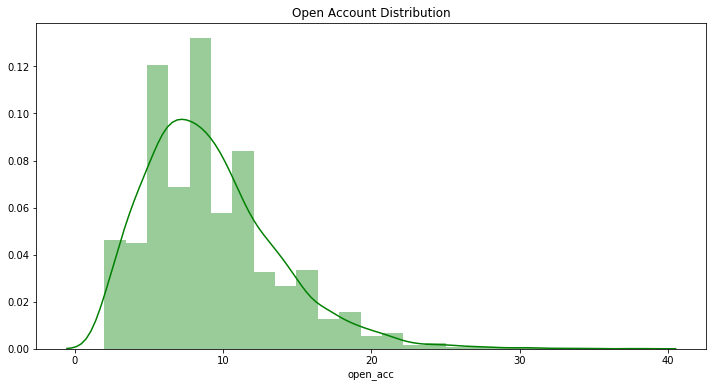

In [93]:
#open account distribution
# The number of open credit lines in the borrower's credit file.
plt.figure(figsize=(12, 6))
sns.distplot(master_num['open_acc'], color='g', bins=25, hist_kws={'alpha': 0.4});
plt.title('Open Account Distribution')

D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Public Record Distribution')

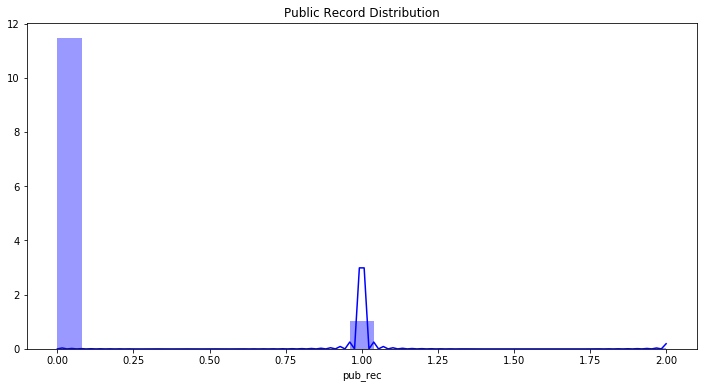

In [94]:
#public record distribution
# Number of derogatory public records
plt.figure(figsize=(12, 6))
sns.distplot(master_num['pub_rec'], color='b', bins=25, hist_kws={'alpha': 0.4});
plt.title('Public Record Distribution')

D:\ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Revolving utilization rate Distribution')

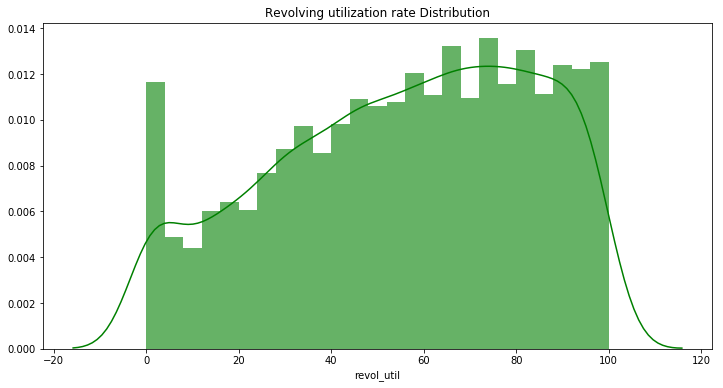

In [95]:
#Revolving utilization rate distribution
# Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
plt.figure(figsize=(12, 6))
sns.distplot(master_num['revol_util'], color='g', bins=25, hist_kws={'alpha': 0.6});
plt.title('Revolving utilization rate Distribution')

# Observation for Univariate- Quantitative Variables Analysis

By plotting all distribution with sns.distplot now we can make some observations regarding quantitative variables when loan status is charged off.

       Variable Name                Attribute Type                    Observation
       
        loan_amnt                   Loan                             Loan amt less than 10000 have more number of defaulters.
        int_rate                    Loan                             Interst rate greater than 12% have more no of defaulter
        installments                Loan                             Found more defaut in installment less than 400.
        annual_inc                  Consumer                         Annual income less than 60000 has more defaulters
        dti                         Consumer                         Debt to income rate more than 14% have more defaulters.
        delinq_2yrs                 Consumer                         Found more default rate that has 1 or more Delinquency
        inq_last_6mths              Consumer                         Found more default rate that has 0 inquiries
        open_acc                    Consumer                         Less than 10 open accounts has more defaults.
        pub_rec                     Consumer                         More default rate found that has 1 or more public record
        revol_util                  Consumer                         Revol_util rate greater than 50% has more defaults.

        
        

# Bivariate -  Analysis of Categorical Variables

In [97]:
#Filter the Target variable Dataframe with Charged Off and fully paid

master_category = master_loan_category[master_loan_category['loan_status'] != 'Current']
master_num = master_loan_num[master_loan_num['loan_status'] != 'Current']

Analyzing Term against loan_status(charged off and fully paid)

Text(0.5,1,'Term')

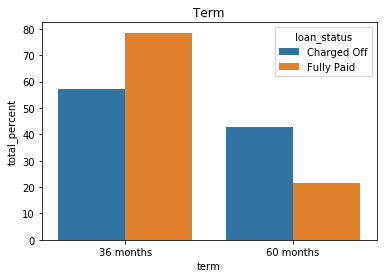

In [104]:
#Get the count of Grouped by loan_status and term
term = master_category.groupby(['loan_status','term'])['term'].count()

#Derive total percent for each group
term_percent = term.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')

#Sort the values in descending order
term_percent.sort_values('total_percent', ascending=False)

#plot the barchart
sns.barplot(x='term', y='total_percent', hue='loan_status',data=term_percent)
plt.title('Term')

Note that the Term with 60 months has got more of defaults 

Now lets Analyse grade and subgrade against loan_status

Text(0.5,1,'Grade against Loan status')

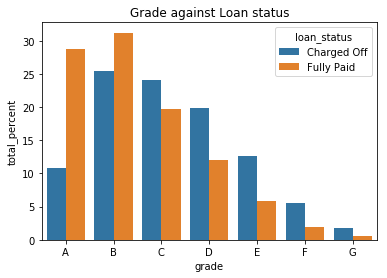

In [105]:
#Get the count of Grouped by loan_status and grade
grade = master_category.groupby(['loan_status','grade'])['grade'].count()

#Derive total percent for each group
grade_percent = grade.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')

#Sort the values in descending order
grade_percent.sort_values('total_percent', ascending=False)

#plot the barchart
sns.barplot(x='grade', y='total_percent', hue='loan_status',data=grade_percent)
plt.title('Grade against Loan status')

Lets get the insights of each grade with the sub grade

Text(0.5,1,'Sub Grade against Loan status')

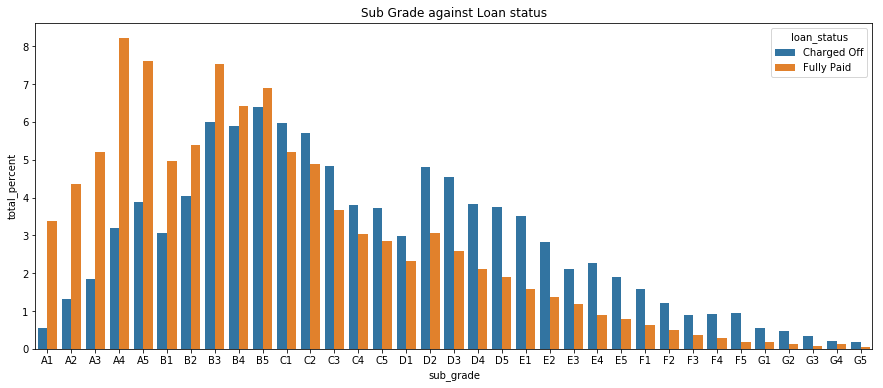

In [106]:
#Get the count of Grouped by loan_status and sub_grade
sub_grade = master_category.groupby(['loan_status','sub_grade'])['sub_grade'].count()

#Derive total percent for each group
sub_grade_percent = sub_grade.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')

#Sort the values in descending order
sub_grade_percent.sort_values('total_percent', ascending=False)

#Plot the barchart
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.barplot(x='sub_grade', y='total_percent', hue='loan_status',data=sub_grade_percent)
plt.title('Sub Grade against Loan status')

Note that the most number of defaults occured in SubGrade between C to G.

Lets Analyse employee Length against loan_status

Text(0.5,1,'Employee Length against loan status')

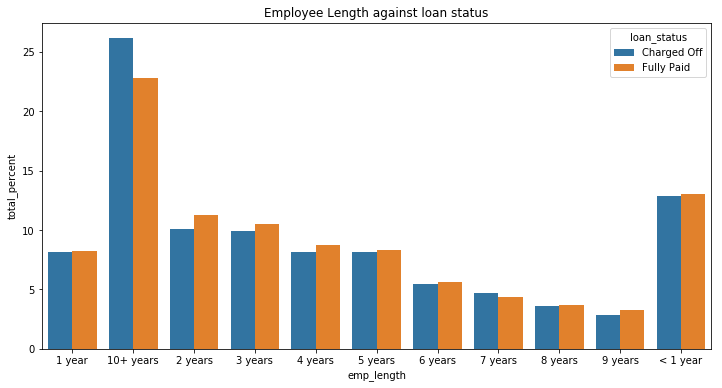

In [110]:
#Get the count of Grouped by loan_status and emp_length
emp_length = master_category.groupby(['loan_status','emp_length'])['emp_length'].count()

#Derive total percent for each group
emp_length_percent = emp_length.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')

#Sort the values in descending order
emp_length_percent.sort_values('total_percent', ascending=False)

#Plot the barchart
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(x='emp_length', y='total_percent', hue='loan_status',data=emp_length_percent)
plt.title('Employee Length against loan status')

There is some observation of default rate in emp_length > 10 years, but we cannot generalized the analysis by considering this variable. 

Lets see home ownership against loan status 

Text(0.5,1,'Home ownership Type against loan status')

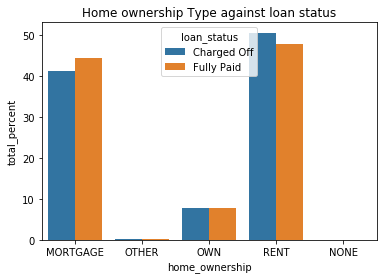

In [111]:
#Get the count of Grouped by loan_status and home_ownership
home_ownership = master_category.groupby(['loan_status','home_ownership'])['home_ownership'].count()

#Derive total percent for each group
home_ownership_percent = home_ownership.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')

#Sort the values in descending order
home_ownership_percent.sort_values('total_percent', ascending=False)

#Plot the barchart
sns.barplot(x='home_ownership', y='total_percent', hue='loan_status',data=home_ownership_percent)
plt.title('Home ownership Type against loan status')

Note that the home_ownership with RENT type has got more defaults 

Now lets look at verification_status against loan_status

Text(0.5,1,'Verification status against loan status')

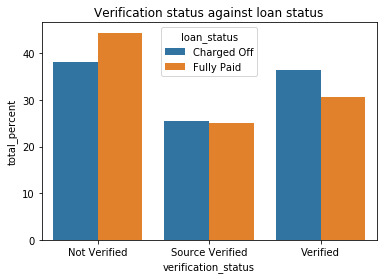

In [113]:
#Get the count of Grouped by loan_status and verification_status
verification_status = master_category.groupby(['loan_status','verification_status'])['verification_status'].count()

#Derive total percent for each group
verification_status_percent = verification_status.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')

#Sort the values in descending order
verification_status_percent.sort_values('total_percent', ascending=False)

#Plot the barchart
sns.barplot(x='verification_status', y='total_percent', hue='loan_status',data=verification_status_percent)
plt.title('Verification status against loan status')

There is some observation of default rate in verified status but there is no importnant difference seen

Now lets look at the pupose against loan status

Text(0.5,1,'Purpose against loan status')

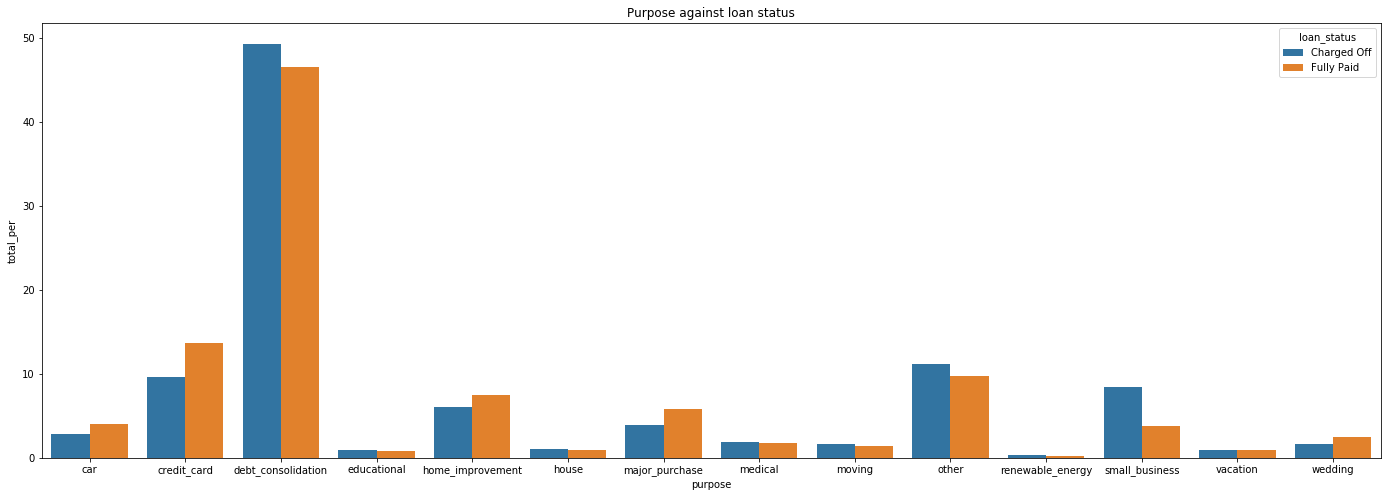

In [114]:
#Get the count of Grouped by loan_status and plot
purpose = master_category.groupby(['loan_status','purpose'])['purpose'].count()
purpose_per = purpose.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
purpose_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='purpose', y='total_per', hue='loan_status',data=purpose_per)
plt.title('Purpose against loan status')

debt_consolidation have more percentage of defaults

lets observe at the addr_state against loan status

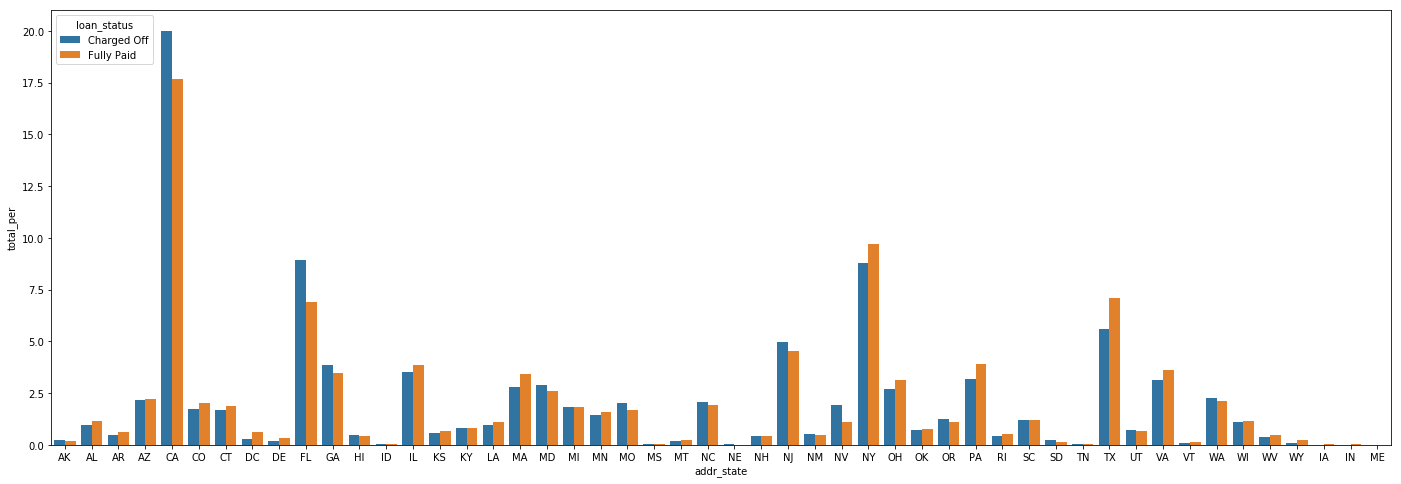

In [59]:
#Get the count of Grouped by loan_status and plot
addr_state = master_cat.groupby(['loan_status','addr_state'])['addr_state'].count()
addr_state_per = addr_state.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
addr_state_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='addr_state', y='total_per', hue='loan_status',data=addr_state_per)

There is no significant difference in Address State

Now lets look at the issue_d against loan status

#  Analysis of Derived Metric

D:\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ananconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\ananconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import s

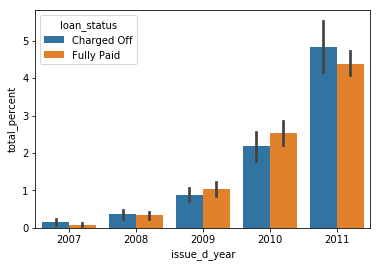

In [115]:
#Convert the issue date to datetime type
master_category['issue_d'] = pd.to_datetime(master_category['issue_d'],format='%b-%y')

#extract month
master_category['issue_d_mon'] = master_category['issue_d'].map(lambda x : x.month)
#extract year
master_category['issue_d_year'] = master_category['issue_d'].map(lambda x : x.year)

#Get the count of Grouped by loan_status and plot
issue_d_year = master_category.groupby(['loan_status','issue_d_year','issue_d_mon'])['issue_d_mon'].count()
issue_d_year_percent = issue_d_year.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
issue_d_year_percent.sort_values('total_percent', ascending=False)

sns.barplot(x='issue_d_year', y='total_percent', hue='loan_status',data=issue_d_year_percent)



Now lets look at the earliest_cr_line against loan status

D:\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


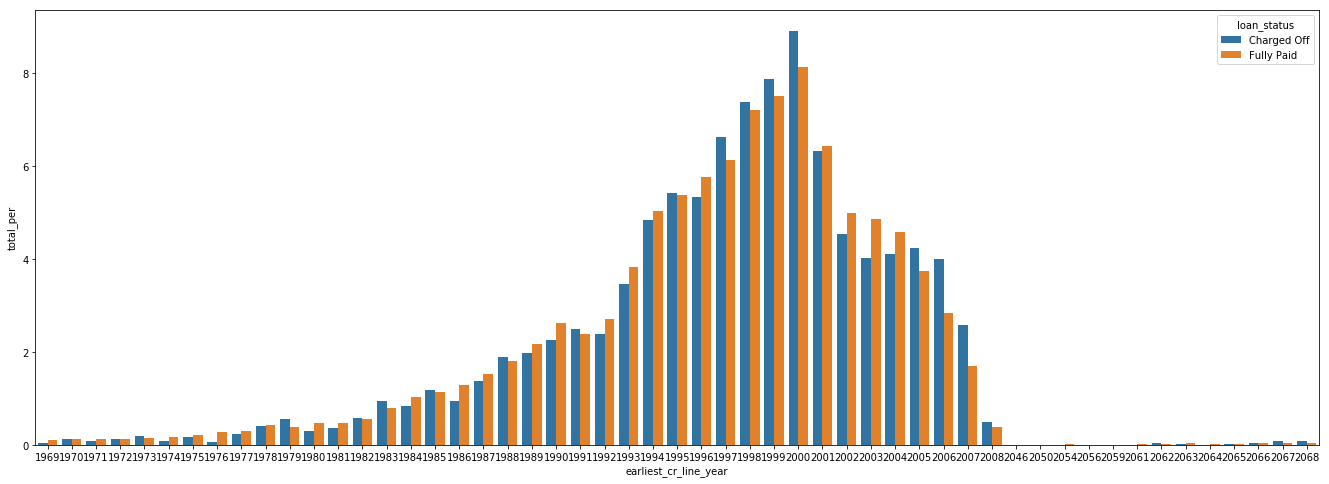

In [116]:
#Get the count of Grouped by loan_status and plot
master_category['earliest_cr_line_year'] = pd.to_datetime(master_category['earliest_cr_line'], format='%b-%y')
#extract year
master_category['earliest_cr_line_year'] = master_category['earliest_cr_line_year'].map(lambda x : x.year)

#plot the barchart
earliest_cr_line_year = master_category.groupby(['loan_status','earliest_cr_line_year'])['earliest_cr_line_year'].count()
earliest_cr_line_year_percent = earliest_cr_line_year.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
earliest_cr_line_year_percent.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(23,8)
sns.barplot(x='earliest_cr_line_year', y='total_per', hue='loan_status',data=earliest_cr_line_year_percent)

Now lets look at the last_credit_pull_d against loan status

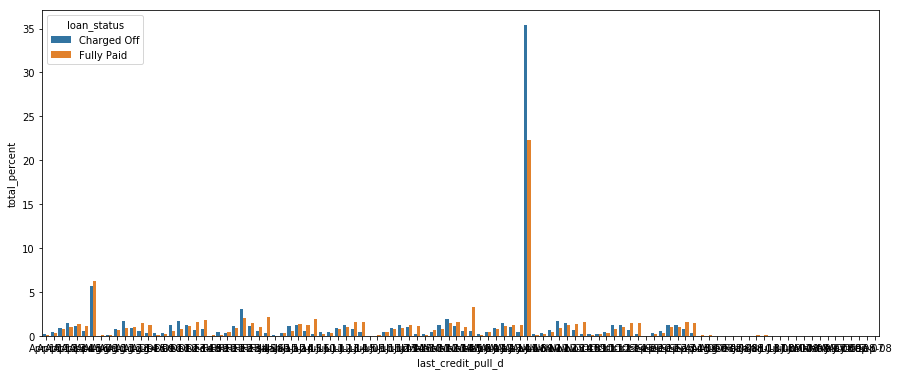

In [123]:
#For last_credit_pull_d against loan_status
last_credit_pull_d = master_category.groupby(['loan_status','last_credit_pull_d'])['last_credit_pull_d'].count()
last_credit_pull_d_percent = last_credit_pull_d.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
last_credit_pull_d_percent.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.barplot(x='last_credit_pull_d', y='total_percent', hue='loan_status',data=last_credit_pull_d_percent)

# Observation for Bivariate- Categorical Variables Analysis

By observing the plot against loan status of various categorical variables we can now make some fruitful observations

             Variable Name                Attribute Type                    Observation
       
        term                         Loan                             Term with 60 months has more number of defaulters.
        grade                        Consumer                         Grade from C to G have more number of Loan defaulters
        sub_grade                    consumer                         From grade C to G more number of default level
        emp_length                   Consumer                         Employee length greater than 10 years have more default
        home_ownership               Consumer                         Rent type home ownership have more defaulters.
        verfication_status           Loan                             Verified and Source verified status has few defaults
        issue_d                      Loan                             2011 have more defaulters
        purpose                      Consumer                         Debt_consolidation have more default rate
        addr_state                   Consumer                         CA and FL have more default rate
        earlist_cr_line              Consumer                         year 2000 have more default rate
        last_credit_pull_d           Loan                             year 2016 have more number of defaulters
        
        

# Bivariate - Quantitative Variables and Segmented Analysis

D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


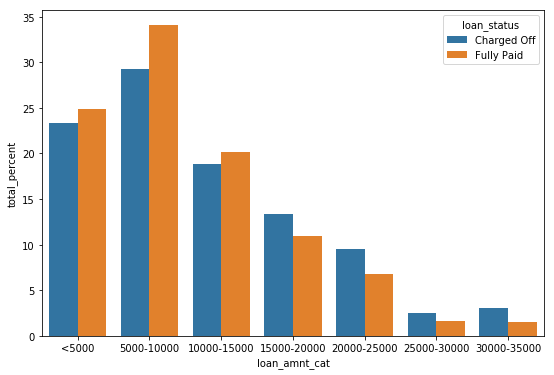

In [124]:
#Binning the loan amount
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = [ '<5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
master_num['loan_amnt_cat'] = pd.cut(master_num['loan_amnt'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
loan_amnt_cat = master_num.groupby(['loan_status','loan_amnt_cat'])['loan_amnt_cat'].count()
loan_amnt_cat_per = loan_amnt_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
loan_amnt_cat_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.barplot(x='loan_amnt_cat', y='total_percent', hue='loan_status',data=loan_amnt_cat_per)

loan amount greater than 15000 has got more default rate

Now lets see interest rate against loan_status

Text(0.5,1,'Interest rate vs Loan status')

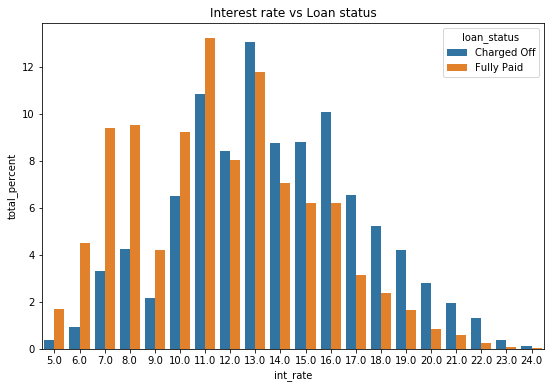

In [126]:
#Get the count of Grouped by loan_status and plot
int_rate = master_num.groupby(['loan_status','int_rate'])['int_rate'].count()
int_rate_percent = int_rate.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
int_rate_percent.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(9,6)
sns.barplot(x='int_rate', y='total_percent', hue='loan_status',data=int_rate_percent)
plt.title('Interest rate vs Loan status')

Interest Rate which is greater than 12 has got more number of defaults

Lets look at the installement variable

D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Installment vs Loan status')

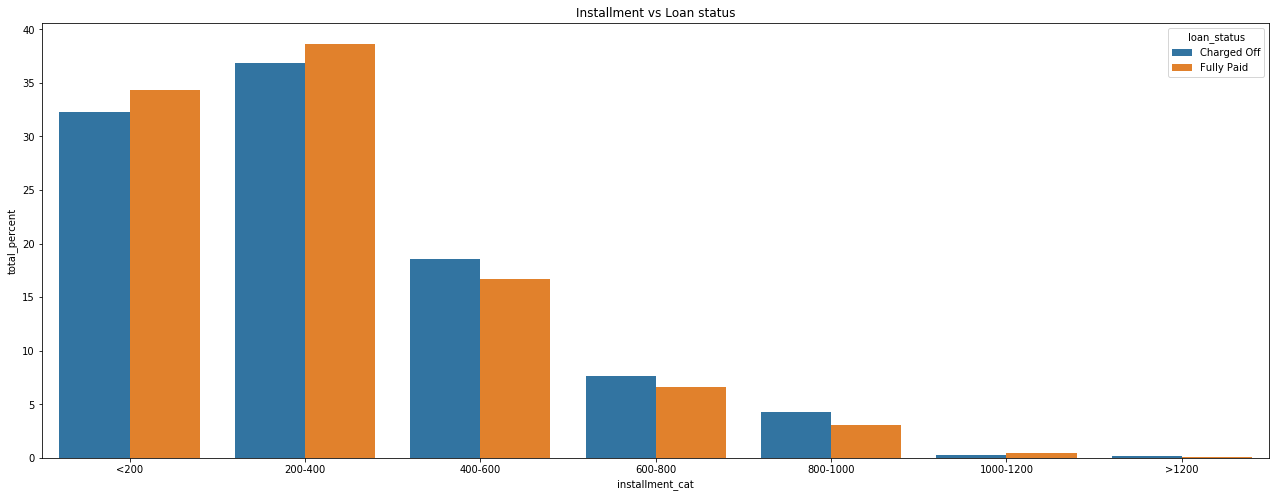

In [127]:
#Binning the installment column
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
labels = [ '<200','200-400','400-600','600-800','800-1000','1000-1200','>1200']
master_num['installment_cat'] = pd.cut(master_num['installment'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
installment = master_num.groupby(['loan_status','installment_cat'])['installment_cat'].count()
installment_percent = installment.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
installment_percent.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(22,8)
sns.barplot(x='installment_cat', y='total_percent', hue='loan_status',data=installment_percent)
plt.title('Installment vs Loan status')

There is no major difference in installment

Lets analyse Annual Income

D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Annual Income vs Loan status')

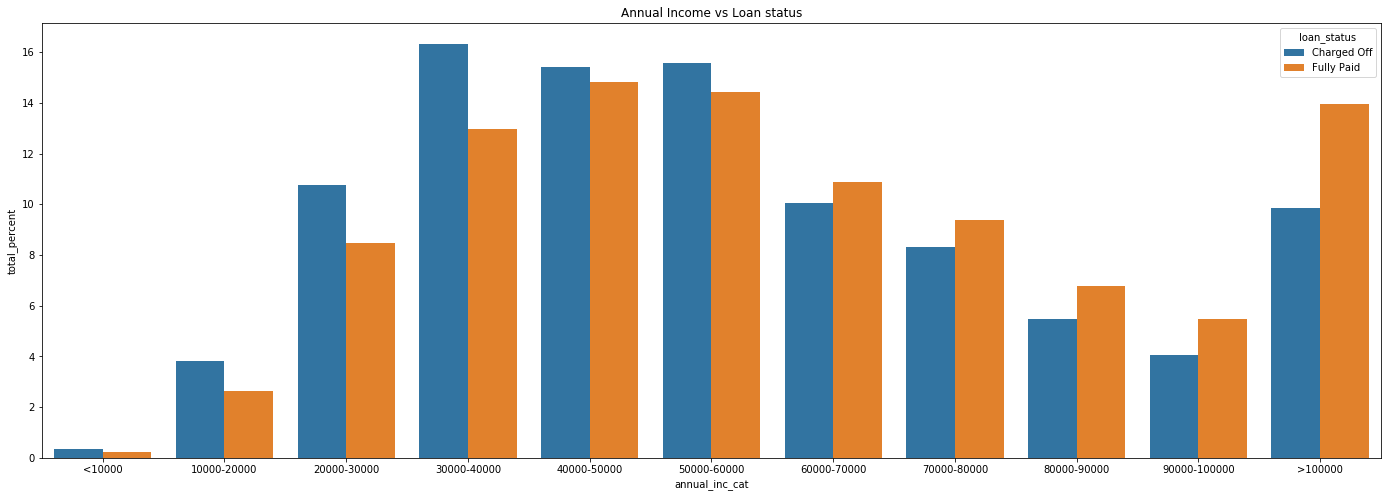

In [129]:
#For annual_inc against loan_status
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 250000]
labels = [ '<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','>100000']
master_num['annual_inc_cat'] = pd.cut(master_num['annual_inc'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
annual_inc_cat = master_num.groupby(['loan_status','annual_inc_cat'])['annual_inc_cat'].count()
annual_inc_cat_per = annual_inc_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
annual_inc_cat_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='annual_inc_cat', y='total_percent', hue='loan_status',data=annual_inc_cat_per)
plt.title('Annual Income vs Loan status')

Annual Income less than 50000 have more defaults than others

Doing the same with debt to income

D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Debt to income vs Loan status')

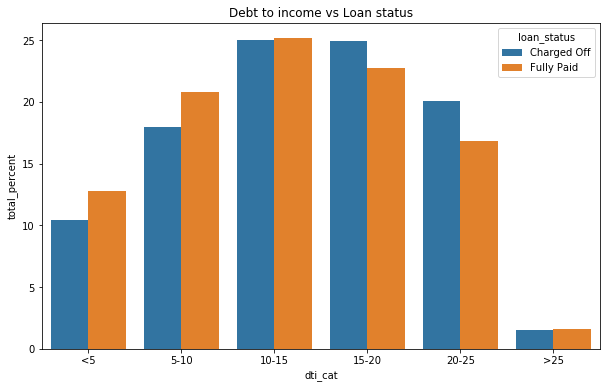

In [132]:
#Binning DTI column
bins = [0, 5, 10, 15, 20, 25, 30]
labels = [ '<5','5-10','10-15','15-20','20-25','>25']
master_num['dti_cat'] = pd.cut(master_num['dti'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
dti_cat = master_num.groupby(['loan_status','dti_cat'])['dti_cat'].count()
dti_cat_per = dti_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
dti_cat_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.barplot(x='dti_cat', y='total_percent', hue='loan_status',data=dti_cat_per)
plt.title('Debt to income vs Loan status')

Dti greater than 15 have the most number of defaults

Now lets look at the delinquance incidence past two years against loan status

Text(0.5,1,'Delinquence vs Loan status')

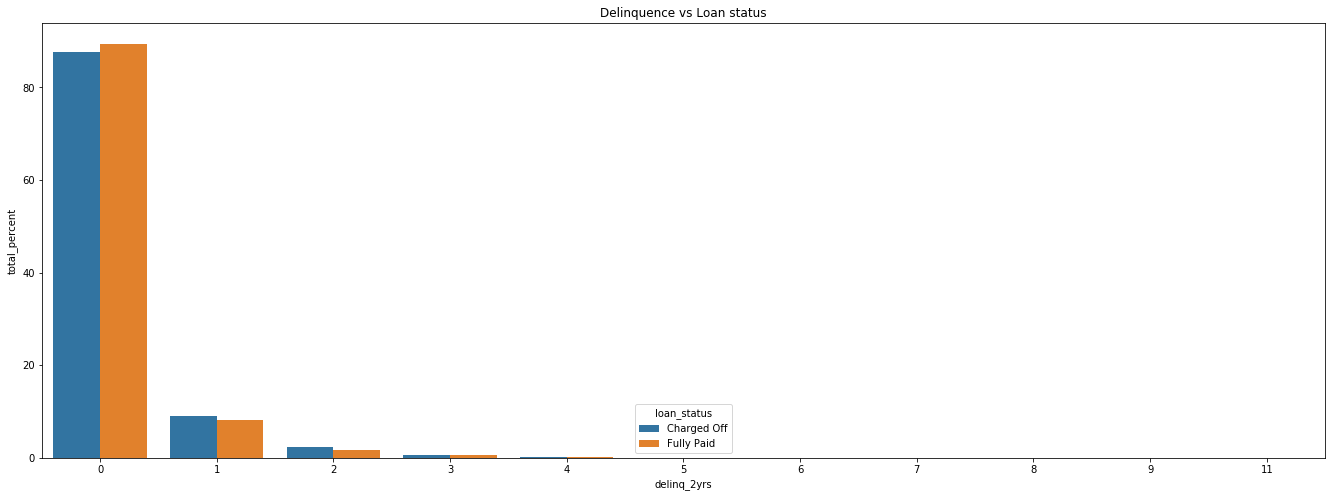

In [135]:
#Get the count of Grouped by loan_status and plot
delinq_2yrs = master_num.groupby(['loan_status','delinq_2yrs'])['delinq_2yrs'].count()
delinq_2yrs_per = delinq_2yrs.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
delinq_2yrs_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(23,8)
sns.barplot(x='delinq_2yrs', y='total_percent', hue='loan_status',data=delinq_2yrs_per)
plt.title('Delinquence vs Loan status')

delinq_2yrs greater than 0 has got more defaults

Analysing number of inquiries past 6 months

Text(0.5,1,'Number of inquiries vs Loan status')

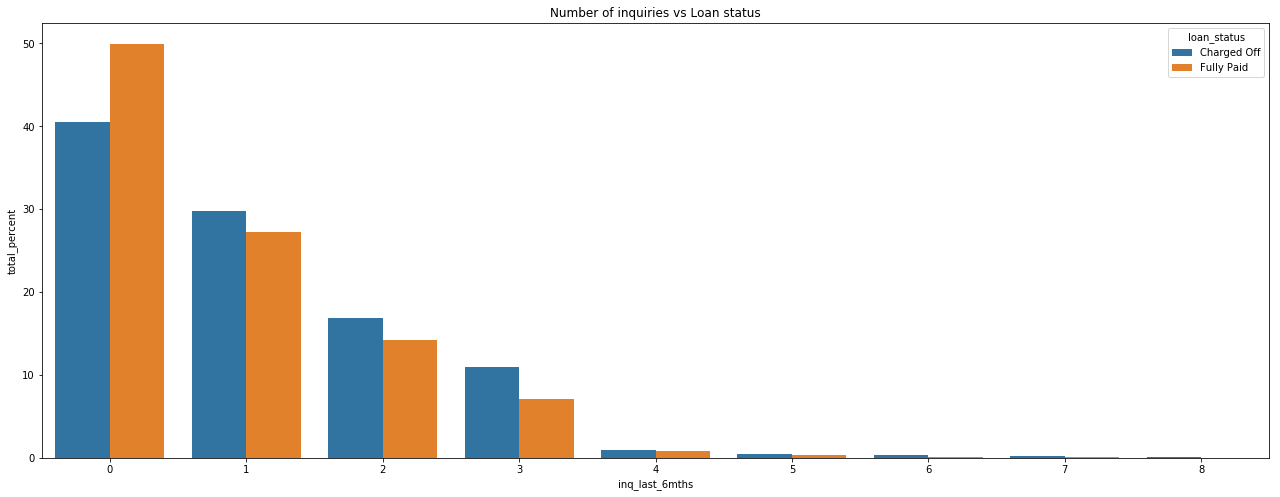

In [136]:
#Get the count of Grouped by loan_status and plot
inq_last_6mths = master_num.groupby(['loan_status','inq_last_6mths'])['inq_last_6mths'].count()
inq_last_6mths_per = inq_last_6mths.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
inq_last_6mths_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(22,8)
sns.barplot(x='inq_last_6mths', y='total_percent', hue='loan_status',data=inq_last_6mths_per)
plt.title('Number of inquiries vs Loan status')

Though inq_last_6mths greater than 0 has got some defaults there is no major difference seen

Now lets look at the open account

D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Open account vs Loan status')

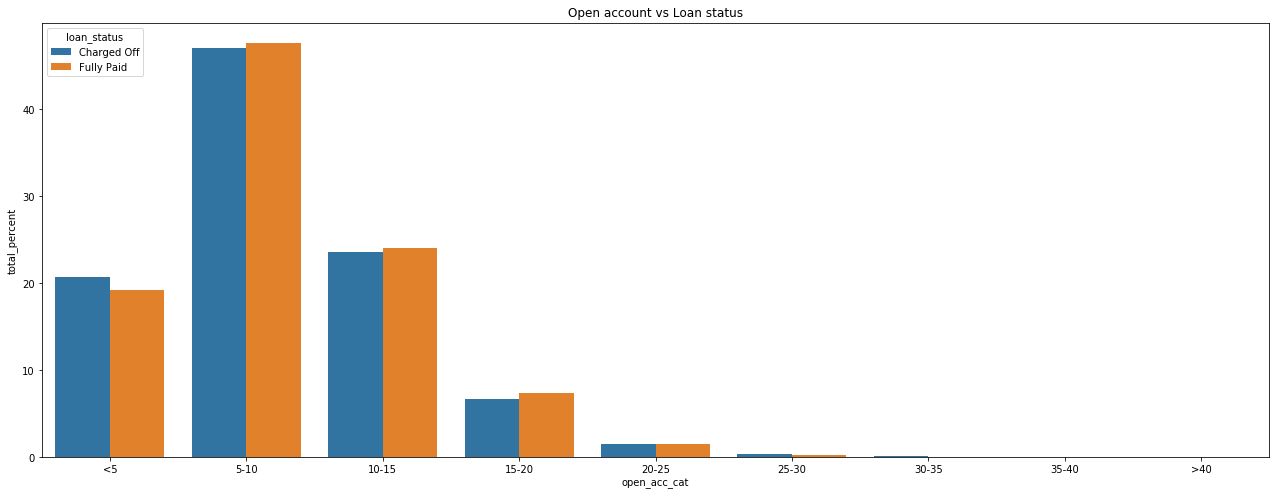

In [138]:
#Binning the open acc values
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
labels = [ '<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','>40']
master_num['open_acc_cat'] = pd.cut(master_num['open_acc'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot

open_acc_cat = master_num.groupby(['loan_status','open_acc_cat'])['open_acc_cat'].count()
open_acc_cat_per = open_acc_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
open_acc_cat_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(22,8)
sns.barplot(x='open_acc_cat', y='total_percent', hue='loan_status',data=open_acc_cat_per)
plt.title('Open account vs Loan status')

Number of Open acccount has got more defaults

Lets look at the insight of data

D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Detailed view of number of Open account vs Loan status')

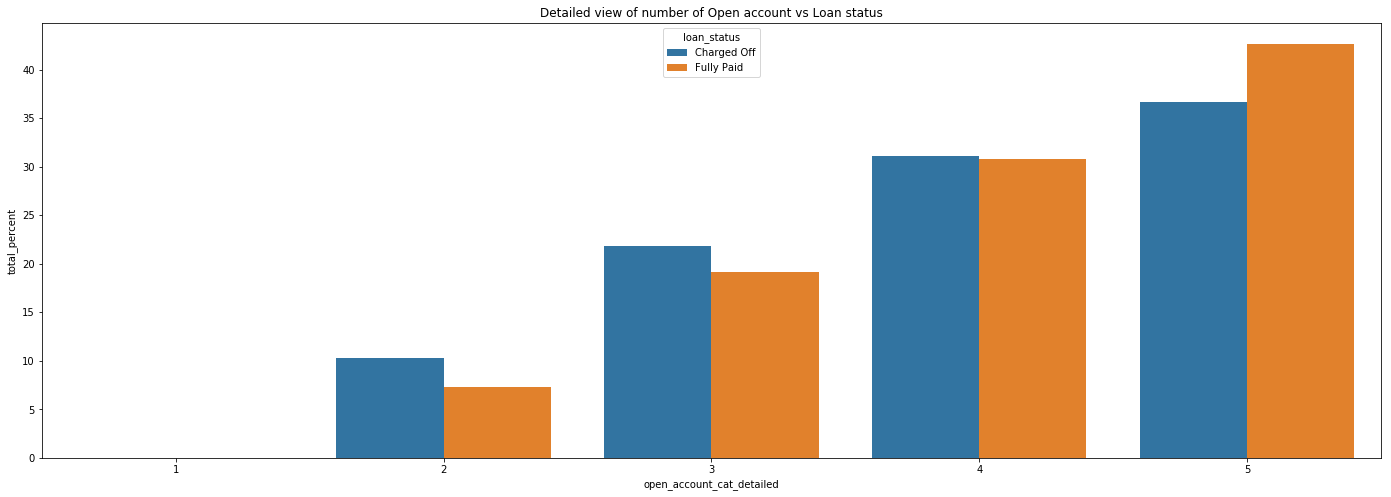

In [142]:
#Expanding the bin of open acc between 0 - 5 for detailed view
bins = [0, 1, 2, 3, 4, 5]
labels = ['1','2','3','4','5']
master_num['open_account_cat_detailed'] = pd.cut(master_num['open_acc'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
open_account_cat_detailed = master_num.groupby(['loan_status','open_account_cat_detailed'])['open_acc_cat'].count()
open_account_cat_detailed_per = open_account_cat_detailed.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
open_account_cat_detailed_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='open_account_cat_detailed', y='total_percent', hue='loan_status',data=open_account_cat_detailed_per)
plt.title('Detailed view of number of Open account vs Loan status')

Number of Open account less than 5 has got more defaults

Lets observe public record against loan status

Text(0.5,1,'Public Record vs Loan status')

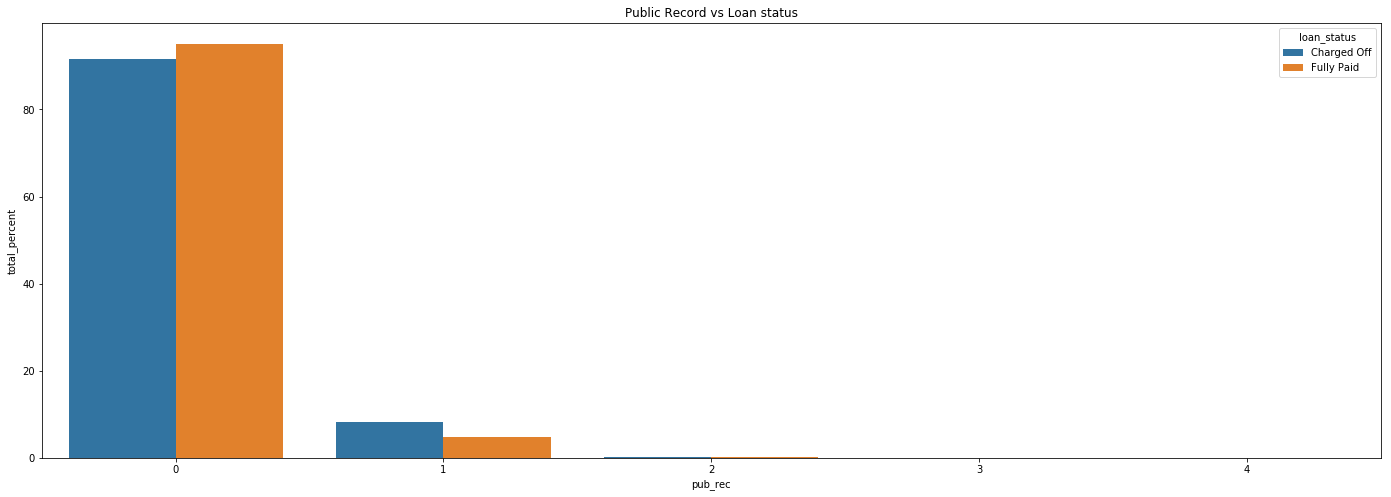

In [144]:
#Get the count of Grouped by loan_status and plot
pub_rec = master_num.groupby(['loan_status','pub_rec'])['pub_rec'].count()
pub_rec_per = pub_rec.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
pub_rec_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='pub_rec', y='total_percent', hue='loan_status',data=pub_rec_per)
plt.title('Public Record vs Loan status')

Number of Public records greater than 0 has more defaults

Lets look at the revolving utilization rate against loan status

D:\ananconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'Revolving Utilisation Rate  vs Loan status')

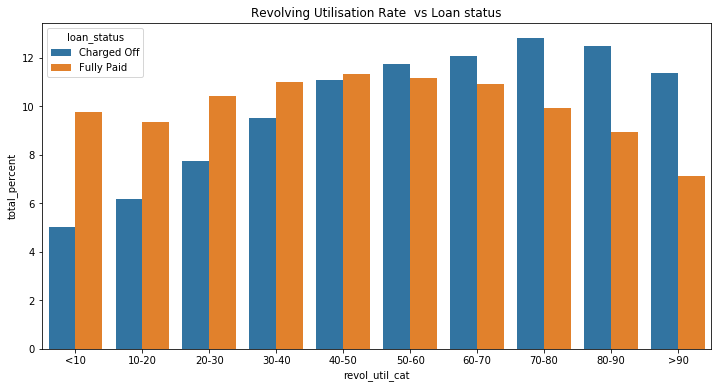

In [145]:
#Binnin revol_util values
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [ '<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90', '>90']
master_num['revol_util_cat'] = pd.cut(master_num['revol_util'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
revol_util_cat = master_num.groupby(['loan_status','revol_util_cat'])['revol_util_cat'].count()
revol_util_cat_per = revol_util_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_percent')
revol_util_cat_per.sort_values('total_percent', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(x='revol_util_cat', y='total_percent', hue='loan_status',data=revol_util_cat_per)
plt.title('Revolving Utilisation Rate  vs Loan status')

Revolving utilization greater than 50 has more defaults. 

# Observation for Bivariate- Quantitative Variables Analysis

By observing all plots of quantitative variable against two loan status charged off and fully paid we can have these observations

        Variable Name                Attribute Type                    Observation
       
        loan_amnt                   Loan                             Loan amt greater than 15000 has more default.
        int_rate                    Loan                             Interst rate greater than 12% has more no of default
        installments                Loan                             Found more defaut in installment greater than 400.
        annual_inc                  Consumer                         Annual income less than 60000 has more defaulters
        dti                         Consumer                         Debt to income rate more than 14% have more defaulters.
        delinq_2yrs                 Consumer                         Found more default rate that has 1 or more Delinquency
        inq_last_6mths              Consumer                         Found more default rate that has 1 or more inquiries
        open_acc                    Consumer                         One has less than 5 open accounts has more defaults.
        pub_rec                     Consumer                         More default rate found that has 1 or more public record
        revol_util                  Consumer                         Revol_util rate greater than 50% has more defaults.

        
        

# Multivariate Analysis - Correlation between the identified variables

Select  the identified variables and form a Data Frame

D:\ananconda\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


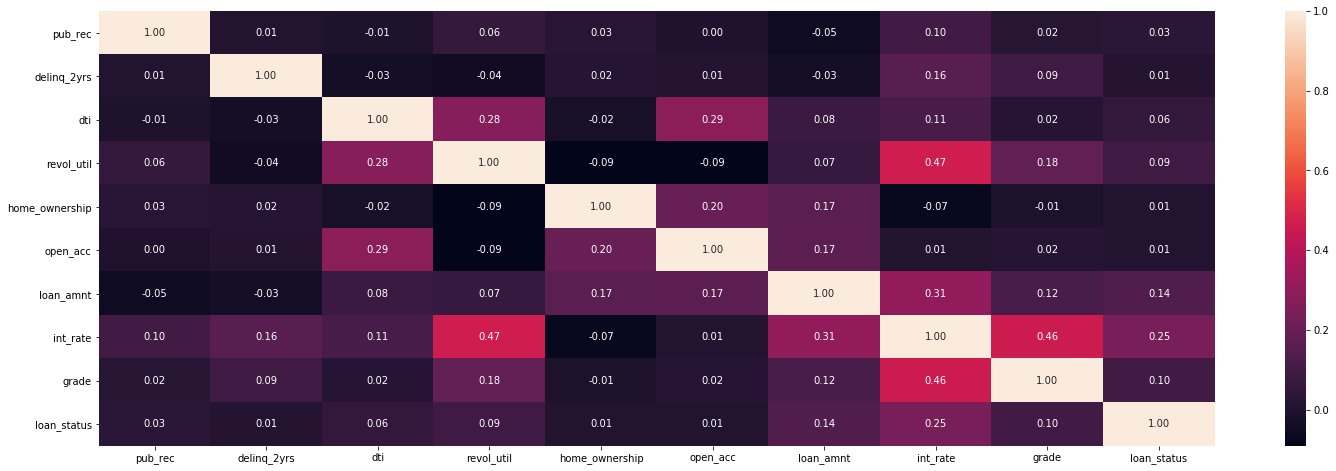

In [147]:
#Select the identified variables
master_loan_final = master_loan[['pub_rec','delinq_2yrs','dti','revol_util','home_ownership','open_acc','loan_amnt','int_rate','grade','loan_status']]

#factorize the category columns to find correlation 
labels, levels = pd.factorize(master_loan_final.home_ownership)
master_loan_final.home_ownership = labels

labels, levels = pd.factorize(master_loan_final.grade)
master_loan_final.grade = labels

labels, levels = pd.factorize(master_loan_final.loan_status)
master_loan_final.loan_status = labels

#Plot the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.heatmap(master_loan_final.corr(), annot=True, fmt=".2f")

Correlation between the driver variables using Heat map

D:\ananconda\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


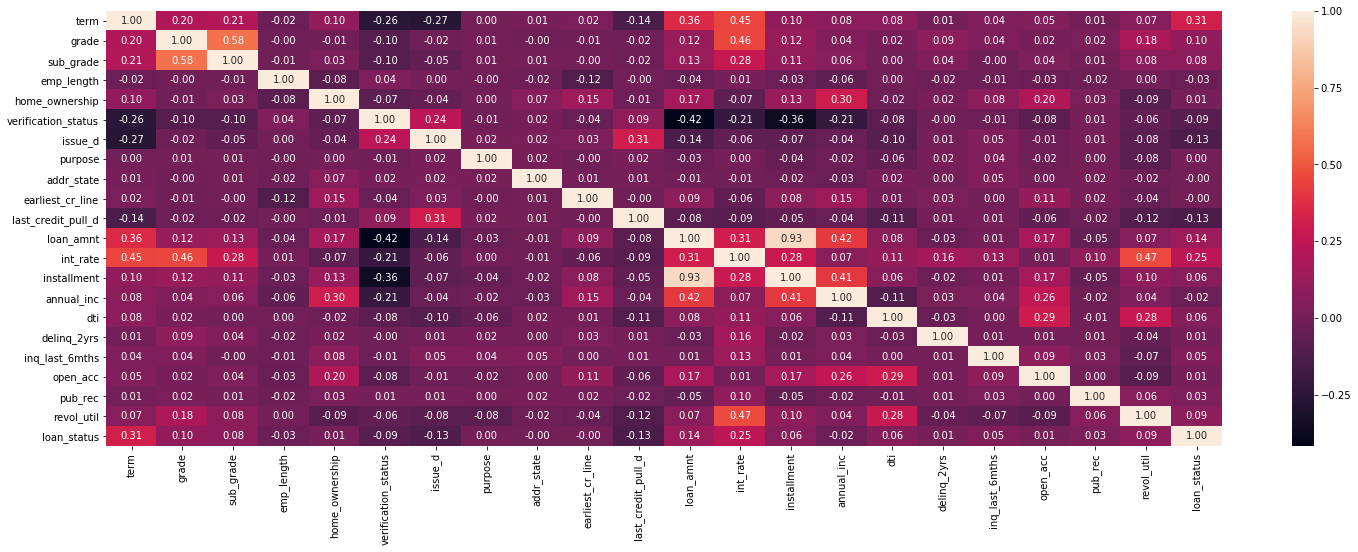

In [150]:
#Heatmap of all variables
column_list = master_loan_category.columns.tolist() + master_loan_num.columns.tolist()
column_list.remove('annual_inc_category')
column_list.remove('loan_status')

#Select the identified variables
master_loan_final = master_loan[column_list]

#factorize the category columns to find correlation 
labels, levels = pd.factorize(master_loan_final.term)
master_loan_final.term = labels

labels, levels = pd.factorize(master_loan_final.grade)
master_loan_final.grade = labels

labels, levels = pd.factorize(master_loan_final.sub_grade)
master_loan_final.sub_grade = labels

labels, levels = pd.factorize(master_loan_final.emp_length)
master_loan_final.emp_length = labels

labels, levels = pd.factorize(master_loan_final.home_ownership)
master_loan_final.home_ownership = labels

labels, levels = pd.factorize(master_loan_final.verification_status)
master_loan_final.verification_status = labels

labels, levels = pd.factorize(master_loan_final.issue_d)
master_loan_final.issue_d = labels

labels, levels = pd.factorize(master_loan_final.loan_status)
master_loan_final.loan_status = labels

labels, levels = pd.factorize(master_loan_final.purpose)
master_loan_final.purpose = labels

labels, levels = pd.factorize(master_loan_final.addr_state)
master_loan_final.addr_state = labels

labels, levels = pd.factorize(master_loan_final.earliest_cr_line)
master_loan_final.earliest_cr_line = labels

labels, levels = pd.factorize(master_loan_final.last_credit_pull_d)
master_loan_final.last_credit_pull_d = labels

#Plot the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(25,8)
sns.heatmap(master_loan_final.corr(), annot=True, fmt=".2f")

# Detailed Analysis of Loan attributes Result

By observing the Heat map, Univariate and Bivariate Analysis we can draw some important conclusion

From the Univariate and Bivariate analysis of loan attributes:

1) Loan Amount(loan_amnt) greater than 15000 have more number of defaults.

2) Interest Rate(int_rate) greater than 12 % have more default rate


From Heat Map between driver variables :

1) There is a positive correlation of 31% between the Loan Amount and Interest Rate.

2) Hence the Loan Amount and Interest Rate will be the suitable driver variables behind Loan Default Analysis from loan point of view.

# Detailed Analysis of Consumer attributes Result

From the Univariate and Bivariate analysis of consumer attributes:

1) Debt-to-Income(dti) greater than 15% has been observed with more defaults.

2) Revolving_Utilization(revol_util) more than 50% has more default rate.

3) Grade between C and G has been observed with more number of defaults.

4) Open_acc less than 5 has more default rate

5) Home Ownership with RENT Type have more number of defaults


From Heat Map between driver variables :

1) There is a positive correlation of 28% between the dti and revol_util.

2) Also revol_util has a strong correlation with int_rate of 47%.

3) Grade has a strong correlation of 45% with Int_rate.

4) Open_acc has a positive correlation of 29% with Dti(Debt to income rate).


Hence the dti, revol_util, Grade, Open_acc and Home_Ownership will be considered as suitable driving factors for Loan Default Analysis from consumer perspective.

# Conclusion :

Lets Draw Final Conclusion regarding Loan Default Analysis from all above Analysis:

1) Grade is determined by the borrowers credit scores and credit history. So it can be used to understand the behaviour of a consumer. We found that the Grade between C and G has more defaults.

2) Capacity of the consumer:

Debt-to-Income(dti) and Revolving Utilization(revol_util) can used to measure the capacity of a consumer for comparison between how much of credit is being used and how much of credit is available.

We found that the Dti ratio > 15 and Revol_Util > 50% has more number of defaults.

3) Security or Guarantee for Loan Repayment (Collateral):

Open_acc and Home_Ownership can be useful in making decision of a consumer's collateral that can be helpful for repayment of a loan. 

We found that the Open_acc < 5 and Home_Ownership as RENT TYPE has number of defaults.


Hence we could like to recommend the Consumer Finance Company to consider these driver variables which are important
indicators for default rate  and risk assessment. They are also useful for determining the loan amount and the interest rate for a consumer loan to be sanctioned.